In [153]:
import os
import pandas as pd
import numpy as np

os.chdir("C:/Users/user/vis")

[' Cwur vs Shanghai 2014.png',
 ' Times vs Cwur 2014.png',
 ' Times vs Cwur 2015.png',
 ' Times vs Shanghai 2014.png',
 ' Times vs Shanghai 2015.png',
 '.ipynb_checkpoints',
 'All Institutions _Private.png',
 'All Institutions _Public.png',
 'All Institutions _Total.png',
 'ARWU.csv',
 'boxplot_cwur_2013 .png',
 'boxplot_cwur_2014 .png',
 'boxplot_cwur_2015 .png',
 'boxplot_cwur_대륙간_2013 .png',
 'boxplot_times_대륙간_2012 .png',
 'boxplot_times_대륙간_2013 .png',
 'Country _ + mean of overlapped variables.ipynb',
 'Country _ 대륙별 분류-Copy1.ipynb',
 'Country _ 대륙별 분류.ipynb',
 'Country _ 영어 비영어 분류.ipynb',
 'Cwur Top10 Trends.png',
 'Cwur vs Shanghai 2012.png',
 'cwur.csv',
 'cwurData.csv',
 'cwurData.ipynb',
 'cwur_country.csv',
 'cwur_country_final.csv',
 'cwur_final.csv',
 'cwur_final.xlsx',
 'cwur_final_withCountry.csv',
 'cwur_lang.csv',
 'cwur_minmax.csv',
 'cwur_real_fianl_please.csv',
 'data 모음',
 'data_times_final.csv',
 'EDA',
 'educational_attainment_supplementary_data.csv',
 'educatio

In [154]:
from plotly.offline import  init_notebook_mode,iplot

import plotly as py

init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
import re

In [156]:
cwur = pd.read_csv("cwur_real_fianl_please.csv")
times = pd.read_csv("times_real_fianl_please.csv")
shanghai = pd.read_csv("shanghai_real_fianl_please.csv")

### 전처리

In [163]:
times['W'] = 1
pt_times = pd.pivot_table(times,index = ["year","country"], values = 'W',aggfunc = "sum")
pt_times = pt_times.reset_index()
pt_times = pt_times.sort_values(["year","W"],ascending = [True,False])
pt_times = pt_times.reset_index(drop=True)
pt_times

,year,country,W
0,2012,English,227
1,2012,Non_English,170
2,2012,Finland,5
3,2013,English,223
4,2013,Non_English,172
5,2013,Finland,5
6,2014,English,222
7,2014,Non_English,173
8,2014,Finland,5
9,2015,English,216


In [164]:
shanghai['W'] = 1
pt_shanghai = pd.pivot_table(shanghai,index = ["year","Country"], values = 'W',aggfunc = "sum")
pt_shanghai = pt_shanghai.reset_index()
pt_shanghai = pt_shanghai.sort_values(["year","W"],ascending = [True,False])
pt_shanghai = pt_shanghai.reset_index(drop=True)
pt_shanghai

,year,Country,W
0,2012,English,166
1,2012,Non_English,118
2,2013,English,69
3,2013,Non_English,29
4,2014,Non_English,255
5,2014,English,245
6,2015,Non_English,258
7,2015,English,242


In [165]:
cwur['W'] = 1
pt_cwur = pd.pivot_table(cwur,index = ["year","country"], values = 'W',aggfunc = "sum")
pt_cwur = pt_cwur.reset_index()
pt_cwur = pt_cwur.sort_values(["year","W"],ascending = [True,False])
pt_cwur = pt_cwur.reset_index(drop=True)
pt_cwur

,year,country,W
0,2012,English,71
1,2012,Non_English,29
2,2013,English,71
3,2013,Non_English,29
4,2014,Non_English,602
5,2014,English,398
6,2015,Non_English,599
7,2015,English,401


In [166]:
times['country'].unique()

array(['English', 'Non_English', 'Finland'], dtype=object)

In [167]:
times['country'] = times['country'].apply(lambda x :re.sub("Finland","Non_English",x))

In [168]:
pt_times_2014 = pt_times[pt_times["year"]==2014]
pt_times_2015 = pt_times[pt_times["year"]==2015]
pt_cwur_2014 = pt_cwur[pt_cwur["year"]==2014]
pt_cwur_2015 = pt_cwur[pt_cwur["year"]==2015]
pt_shanghai_2014 = pt_shanghai[pt_shanghai["year"]==2014]
pt_shanghai_2015 = pt_shanghai[pt_shanghai["year"]==2015]

In [169]:
times2014 = times[times['year']==2014]
times2015 = times[times['year']==2015]
cwur2014 = cwur[cwur['year']==2014]
cwur2015 = cwur[cwur['year']==2015]
shanghai2014 = shanghai[shanghai['year']==2014]
shanghai2015 = shanghai[shanghai['year']==2015]

In [173]:
pt_times_14_drop = pt_times_2014.drop(columns = {"year","W"})
#pt_times_15 = pt_times_15.drop(columns = ["year","W"])
pt_times_14_drop

,country
6,English
7,Non_English
8,Finland


In [174]:
pt_cwur_14_drop = pt_cwur_2014.drop(columns = {"year","W"})
#pt_times_15 = pt_times_15.drop(columns = ["year","W"])
pt_cwur_14_drop

,country
4,Non_English
5,English


In [175]:
pt_shanghai_14_drop = pt_shanghai_2014.drop(columns = {"year","W"})
#pt_times_15 = pt_times_15.drop(columns = ["year","W"])
pt_shanghai_14_drop

,Country
4,Non_English
5,English


In [176]:
pt_times_14_all = pd.merge(pt_times_14_drop,times2014, on = "country")
pt_times_14_all

,country,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,W
0,English,1,California Institute of Technology,94.4,65.8,98.2,99.8,91.2,94.900000,2243.0,6.9,0.27,0.33000,2014,1
1,English,2,Harvard University,95.3,66.2,98.5,99.1,40.6,93.900000,20152.0,8.9,0.25,0.78062,2014,1
2,English,2,University of Oxford,89.0,90.2,98.5,95.4,90.3,93.900000,19919.0,11.6,0.34,0.46000,2014,1
3,English,4,Stanford University,94.7,68.0,96.8,99.1,61.3,93.800000,15596.0,7.8,0.22,0.42000,2014,1
4,English,5,Massachusetts Institute of Technology,92.9,82.0,89.0,100.0,94.3,93.000000,11074.0,9.0,0.33,0.37000,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Non_English,375,University of Porto,20.5,43.9,17.8,47.6,36.7,29.939290,32720.0,18.8,0.09,0.54000,2014,1
396,Non_English,375,University of Rovira i Virgili,19.0,34.3,13.6,64.2,30.6,32.333065,12533.0,12.8,0.09,0.61000,2014,1
397,Non_English,375,University of Tartu,20.3,43.7,21.2,46.2,30.3,30.328545,10269.0,13.0,0.03,0.66000,2014,1
398,Non_English,375,University of Valencia,16.6,39.3,12.4,59.0,31.7,30.105017,58413.0,15.4,0.09,0.60000,2014,1


In [177]:
pt_cwur_14_all = pd.merge(pt_cwur_14_drop,cwur2014, on = "country")
pt_cwur_14_all

,country,Unnamed: 0,world_rank,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,W
0,Non_English,212,13,University of Tokyo,1,17,3,33,12,16,28,26.0,14,80.64,2014,1
1,Non_English,215,16,Kyoto University,2,30,23,15,27,41,61,51.0,18,73.21,2014,1
2,Non_English,217,18,Swiss Federal Institute of Technology in Zurich,1,16,105,13,42,28,45,86.0,84,72.18,2014,1
3,Non_English,221,22,Hebrew University of Jerusalem,1,15,255,16,114,94,493,151.0,40,66.76,2014,1
4,Non_English,223,24,Seoul National University,1,355,9,210,38,165,87,107.0,5,66.06,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,English,1138,939,University of New England (Australia),27,355,478,210,916,552,493,909.0,637,44.34,2014,1
996,English,1143,944,University of Limerick,8,355,478,210,897,868,800,948.0,373,44.33,2014,1
997,English,1168,969,Western Michigan University,229,355,478,210,962,815,800,937.0,737,44.30,2014,1
998,English,1171,972,Ryerson University,32,355,478,210,813,966,609,956.0,637,44.30,2014,1


In [178]:
pt_cwur_14_all = pt_cwur_14_all.iloc[:,0:201]

In [179]:
pt_shanghai_14_drop.columns

Index(['Country'], dtype='object')

In [180]:
pt_shanghai_14_all = pd.merge(pt_shanghai_14_drop,shanghai2014, on = "Country")
pt_shanghai_14_all

,Country,Unnamed: 0,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,W
0,Non_English,400,19,Swiss Federal Institute of Technology Zurich,1,43.900000,30.2,35.5,38.4,46.7,55.6,45.8,2014,1
1,Non_English,402,21,The University of Tokyo,1,43.200000,31.6,14.1,40.6,52.6,73.0,29.2,2014,1
2,Non_English,407,26,Kyoto University,2,39.900000,30.2,37.2,34.4,35.0,61.2,23.8,2014,1
3,Non_English,416,35,Pierre and Marie Curie University - Paris 6,1,35.400000,34.5,27.4,25.8,30.2,60.0,23.8,2014,1
4,Non_English,421,39,University of Copenhagen,1,34.500000,22.3,18.8,27.1,32.0,61.1,36.2,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,English,871,450,University of Tennessee Health Science Center,126-146,10.065016,0.0,0.0,12.3,8.4,22.1,12.6,2014,1
496,English,874,450,University of Wyoming,126-146,10.403788,0.0,0.0,3.6,15.5,23.4,16.5,2014,1
497,English,876,450,Utah State University,126-146,10.705663,13.9,0.0,3.6,10.5,23.8,14.7,2014,1
498,English,877,450,Victoria University of Wellington,3-4,9.947931,11.8,0.0,0.0,8.4,25.0,18.4,2014,1


In [181]:
#pt_times_14_all  = pt_times_14_all.to_csv("pt_times_14_all.csv", index = False)


In [186]:
pt_times_14_all = pt_times_14_all[pt_times_14_all['world_rank'] <= 300]

In [187]:
import plotly.express as px
fig = px.box(pt_times_14_all, x="country", y="world_rank"#,hue = "year",
                 ,color = 'country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
#plt.savefig('boxplot_cwur_2012 .png', width=150,height = 150)

In [188]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
E = pt_times_14_all[pt_times_14_all["country"] == "English"]['world_rank']
nE = pt_times_14_all[pt_times_14_all["country"] == "Non_English"]['world_rank']
stats.mannwhitneyu(x=E, y=nE, alternative = 'less')

MannwhitneyuResult(statistic=8222.0, pvalue=0.00012146865501084805)

In [189]:
pt_times_14_all = pt_times_14_all[pt_times_14_all['world_rank'] <= 200]

In [190]:
import plotly.express as px
fig = px.box(pt_times_14_all, x="country", y="world_rank"#,hue = "year",
                 ,color = 'country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
#plt.savefig('boxplot_cwur_2012 .png', width=150,height = 150)

In [191]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
E = pt_times_14_all[pt_times_14_all["country"] == "English"]['world_rank']
nE = pt_times_14_all[pt_times_14_all["country"] == "Non_English"]['world_rank']
stats.mannwhitneyu(x=E, y=nE, alternative = 'less')

MannwhitneyuResult(statistic=3642.5, pvalue=0.012139991973550132)

In [39]:
pt_cwur_14_all = pt_cwur_14_all.iloc[:,0:201]

In [40]:
fig = px.box(pt_cwur_14_all, x="country", y="world_rank"#,hue = "year",
                 ,color = 'country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
#plt.savefig('boxplot_cwur_2012 .png', width=150,height = 150)

In [41]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
E = pt_cwur_14_all[pt_cwur_14_all["country"] == "English"]['world_rank']
nE = pt_cwur_14_all[pt_cwur_14_all["country"] == "Non_English"]['world_rank']
stats.mannwhitneyu(x=E, y=nE, alternative = 'less')

MannwhitneyuResult(statistic=79165.0, pvalue=5.006136030516173e-20)

In [195]:
pt_shanghai_14_all = pt_shanghai_14_all[pt_shanghai_14_all['world_rank'] <= 300]
pt_shanghai_14_all

,Country,Unnamed: 0,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,W
0,Non_English,400,19,Swiss Federal Institute of Technology Zurich,1,43.900000,30.2,35.5,38.4,46.7,55.6,45.8,2014,1
1,Non_English,402,21,The University of Tokyo,1,43.200000,31.6,14.1,40.6,52.6,73.0,29.2,2014,1
2,Non_English,407,26,Kyoto University,2,39.900000,30.2,37.2,34.4,35.0,61.2,23.8,2014,1
3,Non_English,416,35,Pierre and Marie Curie University - Paris 6,1,35.400000,34.5,27.4,25.8,30.2,60.0,23.8,2014,1
4,Non_English,421,39,University of Copenhagen,1,34.500000,22.3,18.8,27.1,32.0,61.1,36.2,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,English,675,250,University of York,21-29,15.025950,0.0,0.0,13.9,16.2,33.0,20.4,2014,1
421,English,676,250,Virginia Polytechnic Institute and State Unive...,78-104,15.267149,11.8,0.0,11.4,8.4,40.4,16.7,2014,1
422,English,677,250,Washington State University,78-104,13.396173,0.0,0.0,17.3,10.0,30.0,16.1,2014,1
423,English,678,250,Western University (The University of Western ...,8-16,14.556703,0.0,0.0,5.1,15.0,41.9,18.0,2014,1


In [196]:
pt_shanghai_14_all['world_rank'] = pt_shanghai_14_all['total_score'].rank(method = 'min', ascending = False)

In [197]:
fig = px.box(pt_shanghai_14_all, x="Country", y="world_rank"#,hue = "year",
                 ,color = 'Country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
#plt.savefig('boxplot_cwur_2012 .png', width=150,height = 150)

In [198]:
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
E = pt_shanghai_14_all[pt_shanghai_14_all["Country"] == "English"]['world_rank']
nE = pt_shanghai_14_all[pt_shanghai_14_all["Country"] == "Non_English"]['world_rank']
stats.mannwhitneyu(x=E, y=nE, alternative = 'less')

MannwhitneyuResult(statistic=8890.0, pvalue=0.0018631065312417184)

In [165]:
pt_cwur_14_all.columns

Index(['country', 'Unnamed: 0', 'world_rank', 'institution', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year', 'W'],
      dtype='object')

In [13]:

pt_top10_2014 = pt_top10[pt_top10['year'] == 2014]
pt_top10_2015 = pt_top10[pt_top10['year'] == 2015]

In [14]:
pt_top10_2012 = pt_top10_2012.drop(columns = ["year","W"])
pt_top10_2013 = pt_top10_2013.drop(columns = ["year","W"])
pt_top10_2014 = pt_top10_2014.drop(columns = ["year","W"])
pt_top10_2015 = pt_top10_2015.drop(columns = ["year","W"])

In [15]:
cwur2012 = cwur[cwur['year'] == 2012]
cwur2013 = cwur[cwur['year'] == 2013]
cwur2014 = cwur[cwur['year'] == 2014]
cwur2015 = cwur[cwur['year'] == 2015]
pt_top10_2012_all = pd.merge(pt_top10_2012,cwur2012, on = "country")
pt_top10_2013_all = pd.merge(pt_top10_2013,cwur2013, on = "country")
pt_top10_2014_all = pd.merge(pt_top10_2014,cwur2014, on = "country")
pt_top10_2015_all = pd.merge(pt_top10_2015,cwur2015, on = "country")
pt_top10_2012_all

,country,world_rank,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,W
0,USA,1,Harvard University,1,7,9,1,1,1,1,NaN,5,100.00,2012,1
1,USA,2,Massachusetts Institute of Technology,2,9,17,3,12,4,4,NaN,1,91.67,2012,1
2,USA,3,Stanford University,3,17,11,5,4,2,2,NaN,15,89.50,2012,1
3,USA,5,California Institute of Technology,4,2,29,7,37,22,22,NaN,18,85.21,2012,1
4,USA,6,Princeton University,5,8,14,2,53,33,26,NaN,101,82.50,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Germany,90,Technical University of Munich,3,52,101,101,91,76,94,NaN,101,44.32,2012,1
90,Australia,92,University of Queensland,1,101,101,101,67,90,89,NaN,46,44.18,2012,1
91,Australia,94,University of Sydney,2,101,101,101,56,92,85,NaN,69,44.13,2012,1
92,Netherlands,85,Leiden University,1,88,101,76,81,65,101,NaN,101,45.13,2012,1


In [ ]:
shanghai['W'] = 1
pt_shanghai = pd.pivot_table(shanghai,index = ["year","Country"], values = 'W',aggfunc = "sum")
pt_shanghai = pt_shanghai.reset_index()
pt_shanghai = pt_shanghai.sort_values(["year","W"],ascending = [True,False])
pt_shanghai = pt_shanghai.reset_index(drop=True)
pt_shanghai

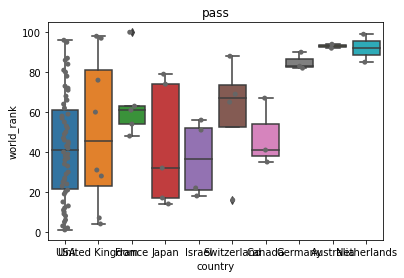

In [16]:
sns.boxplot(x = "country", y = "world_rank", data = pt_top10_2012_all)
sns.stripplot(x = "country", y = "world_rank", data = pt_top10_2012_all,jitter = True,color="0.4")
plt.title("pass")
plt.show()

In [17]:
import plotly.express as px
fig = px.box(pt_top10_2012_all, x="country", y="world_rank",
                 color = 'country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
plt.savefig('boxplot_cwur_2012 .png', width=150,height = 150)

<Figure size 432x288 with 0 Axes>

In [18]:
pt_top10_2012_all.groupby("country")['world_rank'].describe().to_csv("pt_top10_cwur2012.csv")

In [19]:
import plotly.express as px
fig = px.box(pt_top10_2013_all, x="country", y="world_rank",
                 color = 'country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
plt.savefig('boxplot_cwur_2013 .png', width=150,height = 150)

<Figure size 432x288 with 0 Axes>

In [20]:
pt_top10_2013_all.groupby("country")['world_rank'].describe().to_csv("pt_top10_cwur2013.csv")

In [21]:
import plotly.express as px
fig = px.box(pt_top10_2014_all, x="country", y="world_rank",
                 color = 'country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
plt.savefig('boxplot_cwur_2014 .png', width=150,height = 150)

<Figure size 432x288 with 0 Axes>

In [22]:
pt_top10_2014_all.groupby("country")['world_rank'].describe().to_csv("pt_top10_cwur2014.csv")

In [23]:
import plotly.express as px
fig = px.box(pt_top10_2015_all, x="country", y="world_rank",
                 color = 'country' )
fig.update_yaxes(showticklabels=True , matches=None)
fig.update_xaxes(showticklabels=True , matches=None)
fig.show()
plt.savefig('boxplot_cwur_2015 .png', width=150,height = 150)

<Figure size 432x288 with 0 Axes>

In [24]:
pt_top10_2015_all.groupby("country")['world_rank'].describe().to_csv("pt_top10_cwur2015.csv")